This cell is the unrar tool and extracts the numerals.rar dataset into a spacifird folder in google colab for further processing

In [ ]:
# Install unrar in Colab
!apt-get install -y unrar

# Path to your RAR file
rar_path = "/content/numerals.rar"

# Extraction directory
extract_dir = "/content/numerals"

# Create directory if it doesn't exist
import os
os.makedirs(extract_dir, exist_ok=True)

# Extract RAR file
!unrar x "{rar_path}" "{extract_dir}/"

print("Files extracted to:", extract_dir)

Streaming output truncated to the last 5000 lines.
Extracting  /content/numerals/numerals/n_7/78275.png                      79%  OK 
Extracting  /content/numerals/numerals/n_7/78276.png                      79%  OK 
Extracting  /content/numerals/numerals/n_7/78277.png                      79%  OK 
Extracting  /content/numerals/numerals/n_7/78278.png                      79%  OK 
Extracting  /content/numerals/numerals/n_7/78279.png                      79%  OK 
Extracting  /content/numerals/numerals/n_7/78280.png                      79%  OK 
Extracting  /content/numerals/numerals/n_7/78281.png                      79%  OK 
Extracting  /content/numerals/numerals/n_7/78282.png                      79%  OK 
Extracting  /content/numerals/numerals/n_7/78283.png                      79%  OK 
Extracting  /content/numerals/numerals/n_7/78284.png                      79%  OK 
Extracting  /content/numerals

Reads numeral images from folders named by class (0, 1, ..., 9).

Converts each image to grayscale and resizes to 32×32.

Flattens and stores pixel values in a DataFrame.

Labels each image numerically.

Prepares a dataset suitable for training models (e.g., classification).

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data_path = '/content/numerals/numerals'

character_folders = sorted(os.listdir(data_path))

label_mapping = {folder: idx for idx, folder in enumerate(character_folders)}
print("Label mapping:", label_mapping)

image_data = []
image_labels = []

for label_name, label_idx in label_mapping.items():
    folder_path = os.path.join(data_path, label_name)
    image_files = sorted(os.listdir(folder_path))[:200]

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (32, 32))
        image_data.append(img.flatten())
        image_labels.append(label_idx)

image_data = np.array(image_data)
image_labels = np.array(image_labels)

df = pd.DataFrame(image_data)
df['label'] = image_labels

print("DataFrame shape:", df.shape)
print(df.head())

Label mapping: {'n_0': 0, 'n_1': 1, 'n_2': 2, 'n_3': 3, 'n_4': 4, 'n_5': 5, 'n_6': 6, 'n_7': 7, 'n_8': 8, 'n_9': 9}
DataFrame shape: (2000, 1025)
     0    1    2    3    4    5    6    7    8    9  ...  1015  1016  1017  \
0  253  250  250  253  255  253  249  251  246  243  ...   249   254   255   
1  253  254  253  246  247  255  253  247  251  254  ...   248   241   252   
2  254  248  252  251  251  251  245  253  253  254  ...   252   255   255   
3  255  234  247  255  248  244  254  255  255  255  ...   246   254   255   
4  255  250  250  253  254  253  252  255  255  251  ...   251   255   255   

   1018  1019  1020  1021  1022  1023  label  
0   252   253   254   254   254   254      0  
1   255   255   255   255   255   255      0  
2   255   255   255   255   255   255      0  
3   252   253   255   255   255   255      0  
4   248   249   253   254   254   254      0  

[5 rows x 1025 columns]


This code shows one example image for each digit in a 2×5 grid. It takes the first image of each digit, changes it back to 32×32 size, shows it in black and white, writes the digit label above it, and hides the axis lines for a neat view

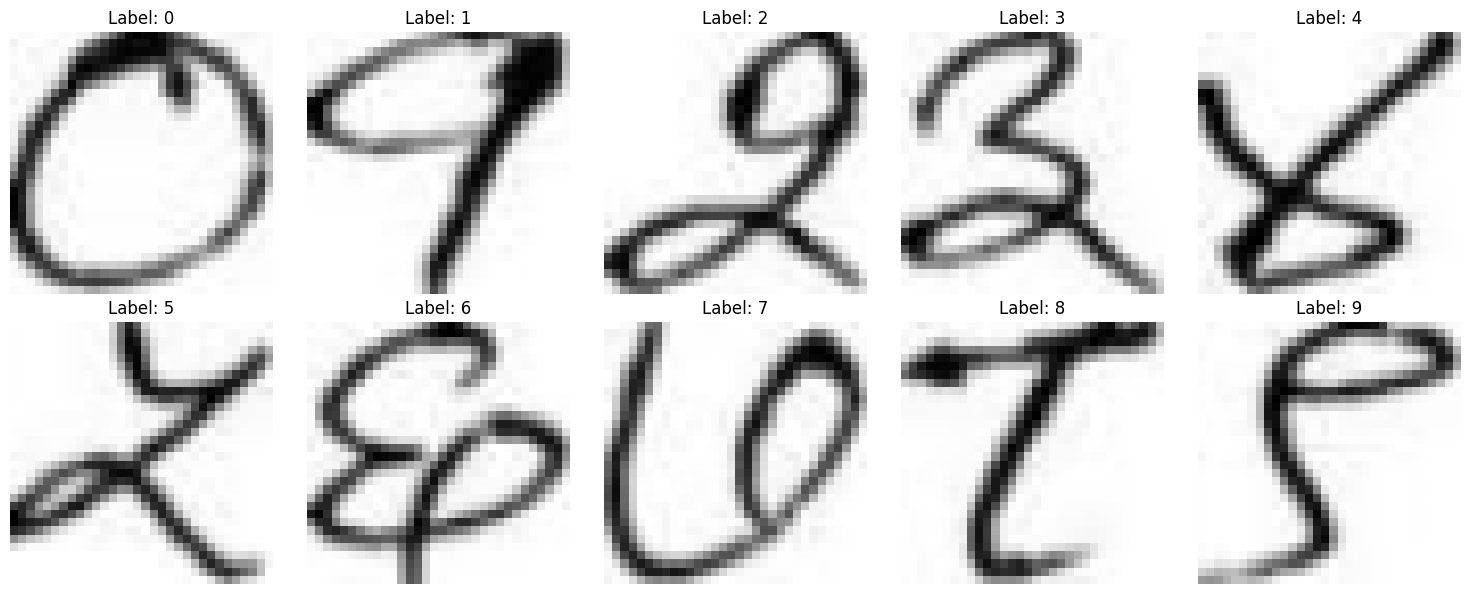

In [ ]:
rows = 2
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
axes = axes.flatten()

for idx, (label, group) in enumerate(df.groupby('label')):
    img_data = group.iloc[0, :-1]
    img = img_data.values.reshape(32, 32)
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(f'Label: {label}')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

This code prepares your dataset for training:

Converts images and labels to NumPy arrays.

Normalizes image pixel values (0–1).

Reshapes images into the format CNNs need.

Splits data into training (80%) and testing (20%) sets.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = np.array(image_data).astype('float32') / 255.0
y = np.array(image_labels)

X = X.reshape(-1, 32, 32, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

FILL IN THE BLANKS

This code creates a TensorFlow Keras Sequential model, compiles it by specifying the optimizer, loss function, and metrics, and then trains it using the .fit() method on a given dataset.

This code builds a CNN (Convolutional Neural Network) to classify 32×32 grayscale images, compiles it with Adam optimizer, and trains it for 10 epochs while checking accuracy on the test set.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np




model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
   layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # For integer labels
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.2495 - loss: 2.1193 - val_accuracy: 0.7375 - val_loss: 0.8218
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8302 - loss: 0.5744 - val_accuracy: 0.8600 - val_loss: 0.4143
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8998 - loss: 0.2902 - val_accuracy: 0.8550 - val_loss: 0.4539
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9397 - loss: 0.2065 - val_accuracy: 0.9275 - val_loss: 0.2719
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9715 - loss: 0.1164 - val_accuracy: 0.9375 - val_loss: 0.2164
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9849 - loss: 0.0630 - val_accuracy: 0.9500 - val_loss: 0.1999
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9895 - loss: 0.0524 - val_accuracy: 0.9450 - val_loss: 0.2180
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0386 - val_accuracy: 0.9500 - val_loss

This code checks how good your trained model is on the test dataset by calculating the loss (error) and accuracy, then prints the accuracy in a nice format.

This code checks how well your model performs on the test dataset and then prints the accuracy result in a clean format.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9598 - loss: 0.1237 
Test accuracy: 0.9500


This code predicts the label for the first test image, then displays the image along with both the model’s predicted label and the true label for quick visual comparison

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


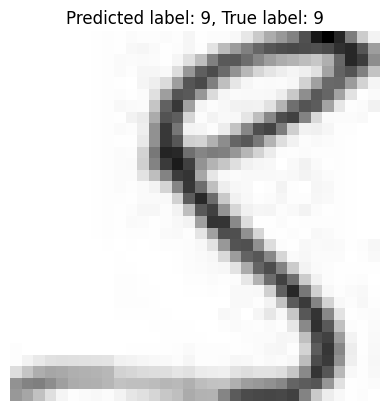

In [ ]:
predictions = model.predict(X_test)

import matplotlib.pyplot as plt

plt.imshow(X_test[0].reshape(32, 32), cmap='gray')
plt.title(f'Predicted label: {np.argmax(predictions[0])}, True label: {y_test[0]}')
plt.axis('off')
plt.show()

Left graph: Training vs Validation Accuracy

Right graph: Training vs Validation Loss
It helps you check how well the model learned and if it is overfitting or improving steadily.

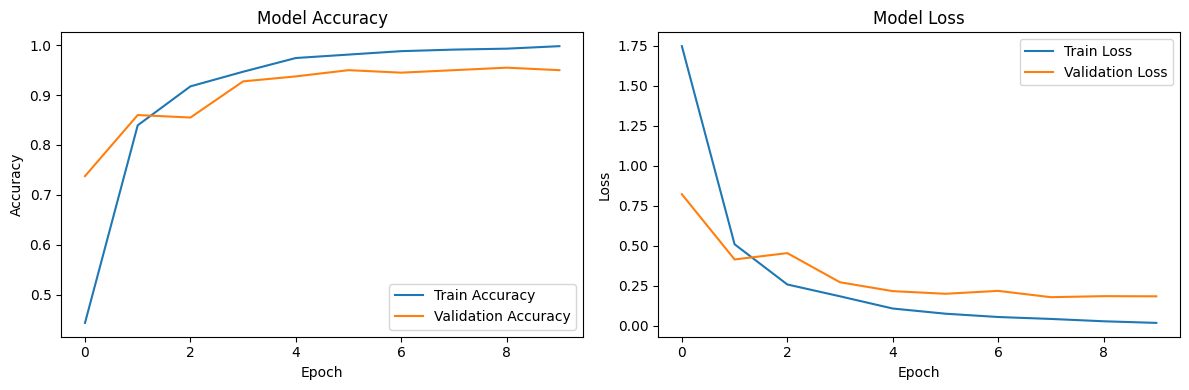

In [ ]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Confusion Matrix: Shows a table of actual vs predicted labels so you can see which classes your model is getting right or wrong.

Heatmap: A colored grid makes the confusion matrix easier to read — darker shades mean more predictions in that cell.

Classification Report: Prints precision, recall, F1-score, and total samples for each class, giving a detailed view of the model’s strengths and weaknesses.

It’s essentially a performance report card for your model.

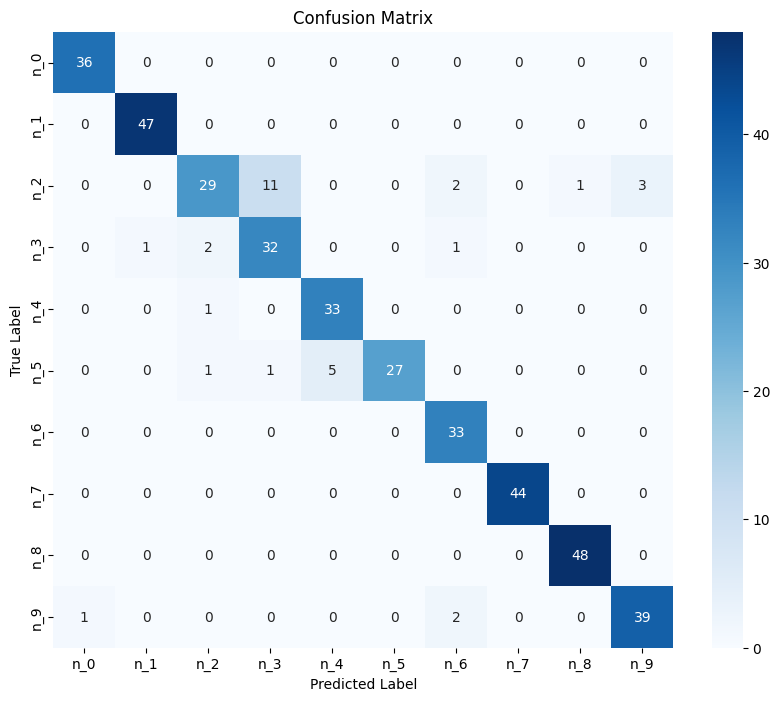

Classification Report:
              precision    recall  f1-score   support

         n_0       0.97      1.00      0.99        36
         n_1       0.98      1.00      0.99        47
         n_2       0.88      0.63      0.73        46
         n_3       0.73      0.89      0.80        36
         n_4       0.87      0.97      0.92        34
         n_5       1.00      0.79      0.89        34
         n_6       0.87      1.00      0.93        33
         n_7       1.00      1.00      1.00        44
         n_8       0.98      1.00      0.99        48
         n_9       0.93      0.93      0.93        42

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report = classification_report(y_test, y_pred, target_names=label_mapping.keys())
print("Classification Report:")
print(report)

In [ ]:
# Save in Keras format
model.save('my_model.keras')   # recommended newer format
